In [1]:
import numpy as np
import spinmob as sm
import matplotlib.pyplot as plt

In [21]:
data_num=1
data_max=20

tau_ini=14
tau_incr=10

amp=[]
tau=[]
noise_err=[]

while (data_num<= data_max):

    filename="data_"+str(data_num)+".dat"
    data = np.transpose(np.loadtxt(filename)) 
    
    if data_num<=3:
        tau=np.append(tau,tau_ini)
        amp=np.append(amp, -np.max(data[1]))
    else:
        tau=np.append(tau,tau_ini)
        amp=np.append(amp, np.max(data[1]))
    tau_ini+= tau_incr
    
    data_num+=1

err = 0.1+0.1*np.random.rand(data_max)

In [29]:
def func(x,M0=12.1,T1=64):
    return M0*(1-2*np.exp(-x/(T1)))

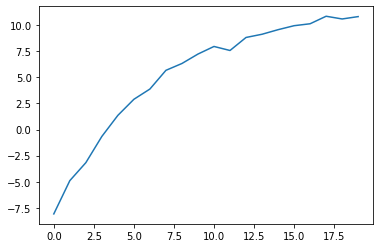

In [36]:
x = np.linspace(10,200,20)
data = func(x)
error = np.random.normal(0,0.28,len(x))
data = data+error
plt.plot(data)

<Figure size 1080x720 with 0 Axes>

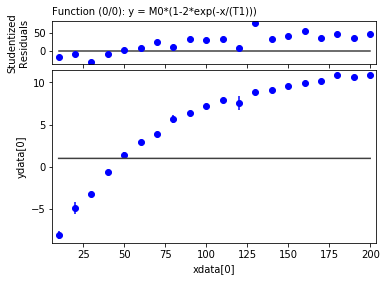

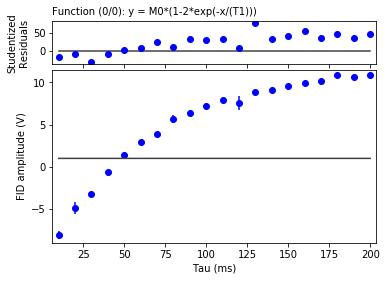

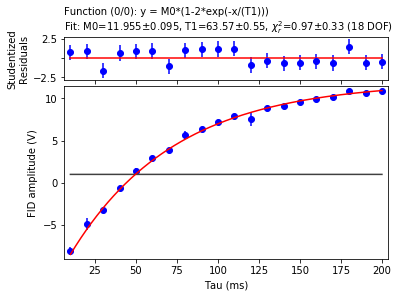

<Figure size 432x288 with 0 Axes>

In [40]:
fit = sm.data.fitter()
fit.set_functions(f='M0*(1-2*exp(-x/(T1)))', p='M0,T1')
fit.set_data(xdata=x, ydata=data, eydata=error)
fit.set(xlabel='Tau (ms)', ylabel='FID amplitude (V)')
fit.fit()
plt.savefig('light_oil_T1.png')